In [51]:
!pip install colorama
!pip install catboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Style

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [16]:
df=pd.read_csv("/content/UberDataset.csv")


In [17]:
df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [18]:
print(f"{Fore.GREEN}The Shape of Dataset is: {df.shape}.{Style.RESET_ALL}")


The Shape of Dataset is: (1156, 7).


In [19]:
print(f"{Fore.BLUE}Information of Features in Dataset: \n.{Style.RESET_ALL}")
df.info()

Information of Features in Dataset: 
.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [20]:
print(f"{Fore.RED}Statistical Analysis of Feature 'MILES: \n.{Style.RESET_ALL}")
df.describe()

Statistical Analysis of Feature 'MILES: 
.


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [21]:
print(f"{Fore.YELLOW}Duplicat Row in Dataset: \n.{Style.RESET_ALL}")

df[df.duplicated()]

Duplicat Row in Dataset: 
.


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [22]:
df.drop_duplicates(inplace = True)


In [23]:
print(f"{Fore.MAGENTA}Null Values in Each Feature: \n.{Style.RESET_ALL}")
df.isnull().sum()

Null Values in Each Feature: 
.


,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [24]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")
df.dropna(inplace = True)

In [25]:
df.isnull().sum()


,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


In [26]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

ValueError: time data "1/13/2016 13:54" doesn't match format "%m-%d-%Y %H:%M", at position 23. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [27]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='mixed', dayfirst=True)
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='mixed', dayfirst=True)

#create new feature representing time of the ride - morning, afternoon, evening, night
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

#create new feature representing month of the ride
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)
#create new feature representing day (week) of the ride
df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)

# duration of the ride
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']) / np.timedelta64(1, 'm')

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,1,Night,Feb,Mon,12.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Feb,Mon,13.0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,May,Sun,14.0
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,June,Wed,67.0


In [28]:
df.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'CATEGORY': 'category',
    'START' : 'start',
    'STOP' : 'stop',
    'MILES' : 'miles',
    'PURPOSE' : 'purpose'
}, inplace=True)

In [30]:
df['day_name'] = df['start_date'].dt.day_name()

time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['time_label'] = pd.cut(df['start_date'].dt.hour, bins=time_periods, labels=labels, right=False)

df["month"] = df['start_date'].dt.month_name()

df['duration'] = (df['end_date'] - df['start_date']) / np.timedelta64(1, 'm')

In [31]:
print(f"{Fore.LIGHTRED_EX}New Data: \n.{Style.RESET_ALL}")
data = df.copy()
df.head(5)

New Data: 
.


,start_date,end_date,category,start,stop,miles,purpose,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE,day_name,time_label,month,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0,Friday,Evening,January,6.0
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,1,Night,Feb,Mon,12.0,Monday,Night,February,12.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Feb,Mon,13.0,Monday,Evening,February,13.0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,May,Sun,14.0,Sunday,Afternoon,May,14.0
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,June,Wed,67.0,Wednesday,Afternoon,June,67.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

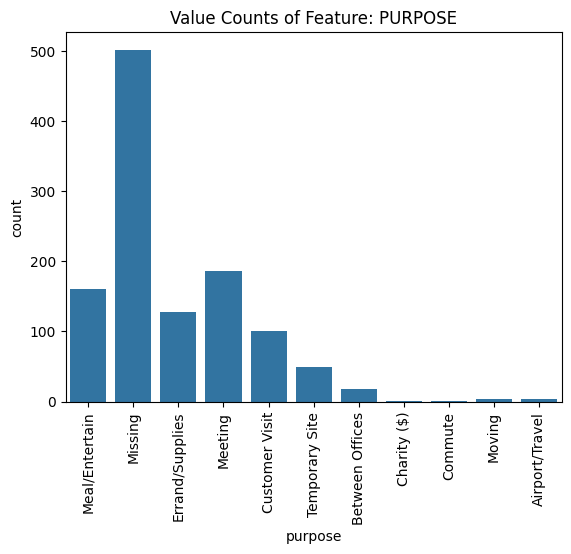

In [32]:
sns.countplot(x=df["purpose"])
plt.title("Value Counts of Feature: PURPOSE")
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

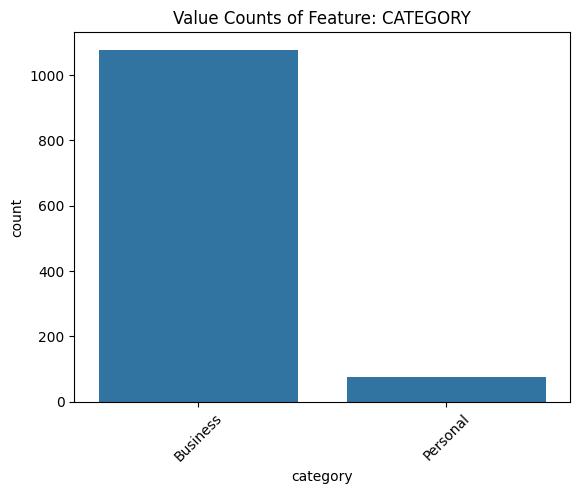

In [33]:
sns.countplot(x=df["category"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Thursday')])

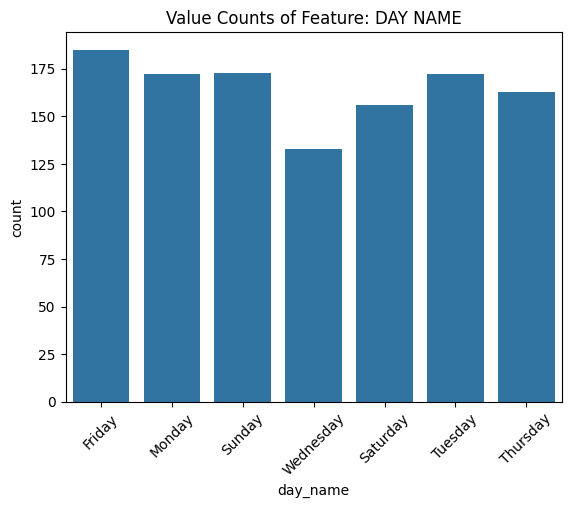

In [34]:
sns.countplot(x=df["day_name"])
plt.title("Value Counts of Feature: DAY NAME")
plt.xticks(rotation=45)


([0, 1, 2, 3],
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

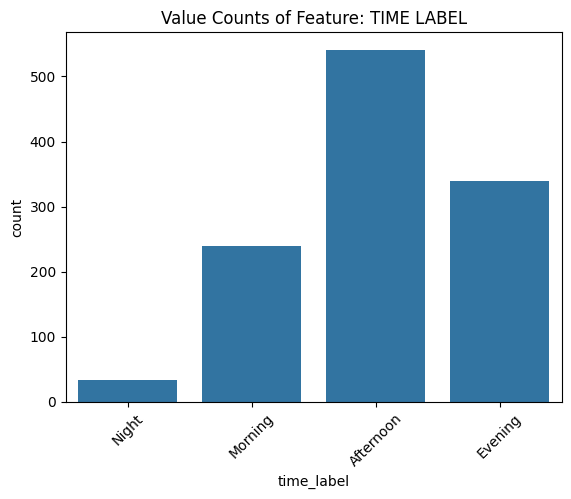

In [35]:
sns.countplot(x=df["time_label"])
plt.title("Value Counts of Feature: TIME LABEL")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'May'),
  Text(3, 0, 'June'),
  Text(4, 0, 'July'),
  Text(5, 0, 'October'),
  Text(6, 0, 'November'),
  Text(7, 0, 'December'),
  Text(8, 0, 'April'),
  Text(9, 0, 'August'),
  Text(10, 0, 'September'),
  Text(11, 0, 'March')])

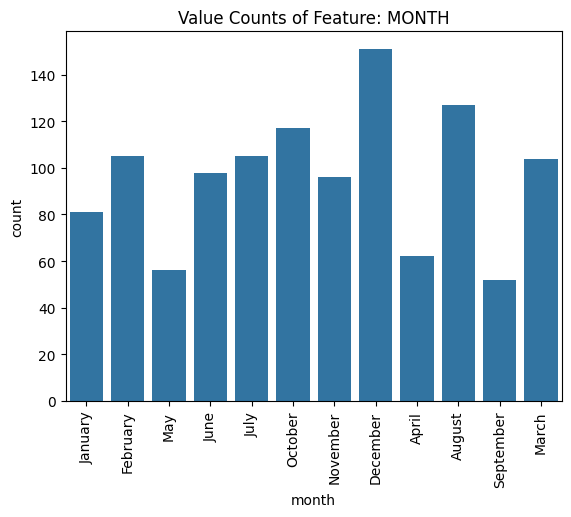

In [36]:
sns.countplot(x=df["month"])
plt.title("Value Counts of Feature: MONTH")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

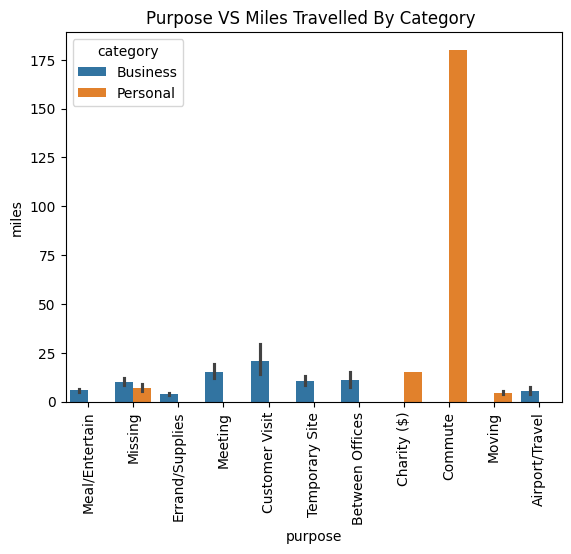

In [37]:
sns.barplot(x= df["purpose"], y= df['miles'],hue = df["category"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Outliers in MILES over TIME')

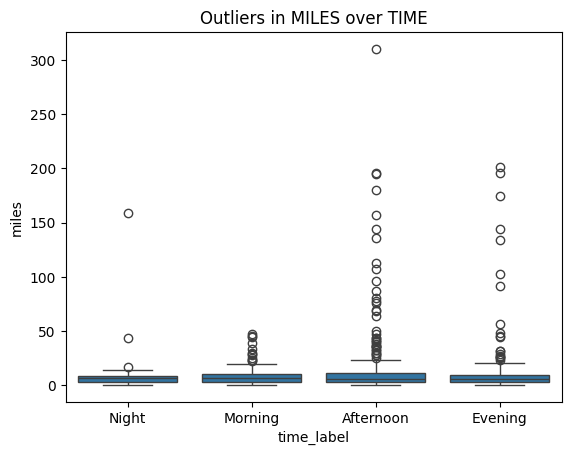

In [38]:
sns.boxplot(x=df["time_label"],y=df["miles"])
plt.title("Outliers in MILES over TIME")

Text(0.5, 1.0, 'Outliers in Duration')

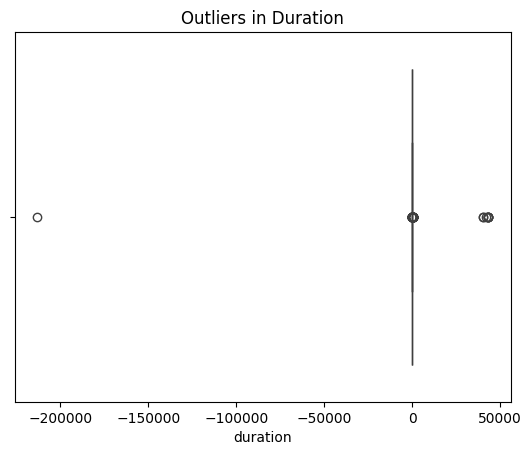

In [39]:
sns.boxplot(x=df["duration"],data=df)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in Miles')

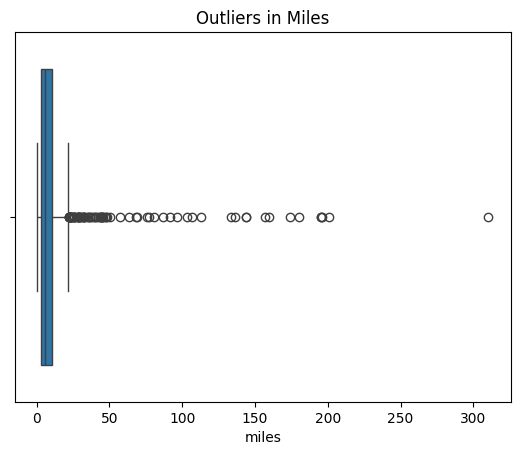

In [40]:
sns.boxplot(x=df['miles'],data = df)
plt.title("Outliers in Miles")

Text(0.5, 1.0, 'Density PLot for Miles')

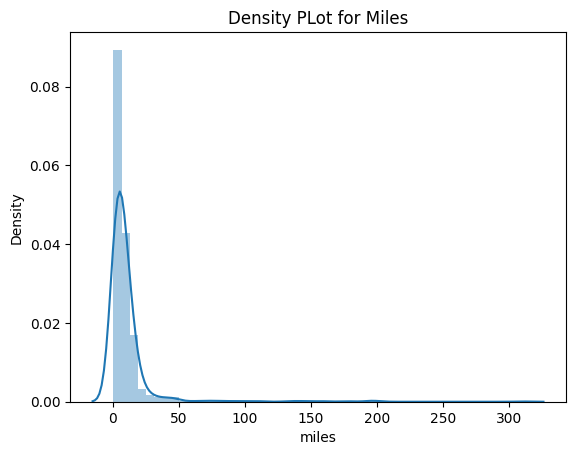

In [41]:
sns.distplot(df["miles"])
plt.title("Density PLot for Miles")

Text(0.5, 1.0, 'Density PLot for Duration')

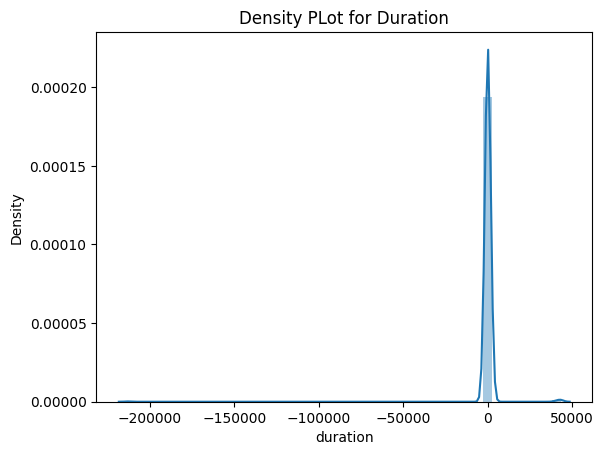

In [42]:
sns.distplot(df["duration"])
plt.title("Density PLot for Duration")

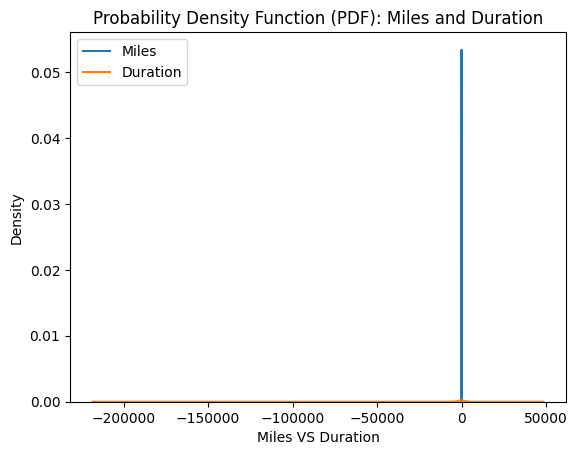

In [43]:
sns.distplot(df["miles"],hist = False,label="Miles")
sns.distplot(df["duration"],hist = False, label="Duration")
plt.title("Probability Density Function (PDF): Miles and Duration")
plt.xlabel("Miles VS Duration")
plt.legend()

Outliers in data: 
.


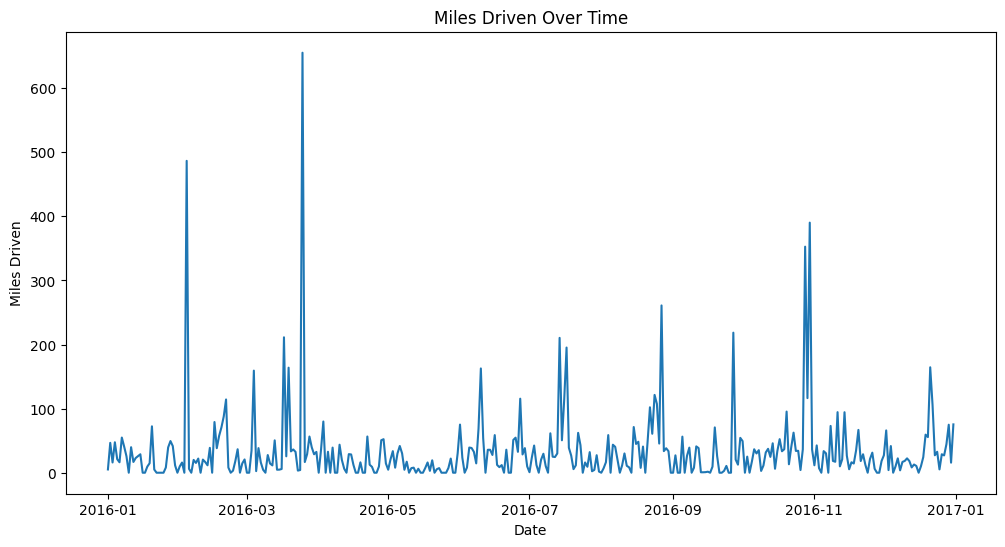

In [44]:
print(f"{Fore.CYAN}Outliers in data: \n.{Style.RESET_ALL}")
df = df[df['start_date'] != "Totals"]
df['start_date'] = pd.to_datetime(df['start_date'])
df.set_index('start_date', inplace=True)
daily_miles = df.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

In [45]:
Q1_miles = np.percentile(df['miles'], 25)
Q3_miles = np.percentile(df['miles'], 75)
IQR_miles = Q3_miles - Q1_miles

# Calculate IQR for 'duration' feature
Q1_duration = np.percentile(df['duration'], 25)
Q3_duration = np.percentile(df['duration'], 75)
IQR_duration = Q3_duration - Q1_duration

# Define outlier boundaries
lower_bound_miles = Q1_miles - 1.5 * IQR_miles
upper_bound_miles = Q3_miles + 1.5 * IQR_miles

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# Identify and deal with outliers
df['miles'] = np.where(df['miles'] < lower_bound_miles, lower_bound_miles, df['miles'])
df['miles'] = np.where(df['miles'] > upper_bound_miles, upper_bound_miles, df['miles'])

df['duration'] = np.where(df['duration'] < lower_bound_duration, lower_bound_duration, df['duration'])
df['duration'] = np.where(df['duration'] > upper_bound_duration, upper_bound_duration, df['duration'])

After Outliers Treatment: 
.


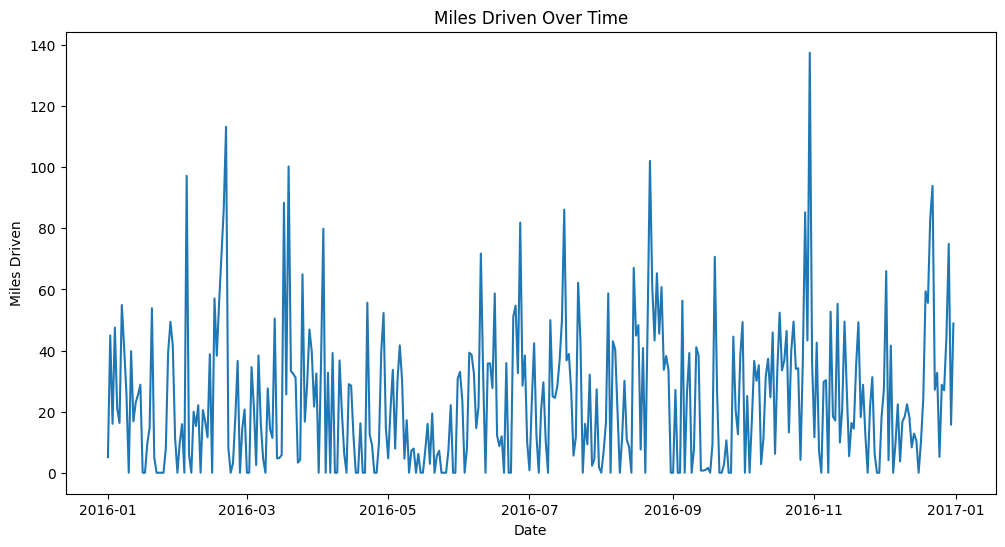

In [46]:
print(f"{Fore.RED}After Outliers Treatment: \n.{Style.RESET_ALL}")
daily_miles = df.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()


In [47]:
data.head()


,start_date,end_date,category,start,stop,miles,purpose,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE,day_name,time_label,month,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0,Friday,Evening,January,6.0
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,1,Night,Feb,Mon,12.0,Monday,Night,February,12.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Feb,Mon,13.0,Monday,Evening,February,13.0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,May,Sun,14.0,Sunday,Afternoon,May,14.0
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,June,Wed,67.0,Wednesday,Afternoon,June,67.0


In [55]:
df_encoded = pd.get_dummies(data, columns=['category', 'start', 'purpose', 'stop', 'day_name', 'time_label', 'month', 'TIME_OF_DAY', 'MONTH_OF_THE_RIDE', 'DAY_OF_THE_RIDE'])

In [49]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['miles',"start_date","end_date"], axis=1)
y = df_encoded['miles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

In [53]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
    'KNN Regressor' : KNeighborsRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor()
}

In [58]:
for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy[name] = r2

    print(f"Results for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()

In [59]:
accuracy_df = pd.DataFrame({'Model': list(accuracy.keys()), 'Accuracy Score': list(accuracy.values())})
accuracy_df

,Model,Accuracy Score
